In [2]:
#level1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv(r"C:\Users\prasa\Downloads\food.csv")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [20]:
print(df.columns)
df['Cuisines'].value_counts()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Fast Food                                                354
Chinese                                                  354
North Indian, Mughlai                                    334
                                                        ... 
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Healthy Food, North Indian                                 1
Italian, World Cuisine                                     1
Name: count, Length: 1828, dtype: int64

top 3 Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Fast Food                354
Name: count, dtype: int64

top 3 Cuisines percentage:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Fast Food                3.706418
Name: count, dtype: float64


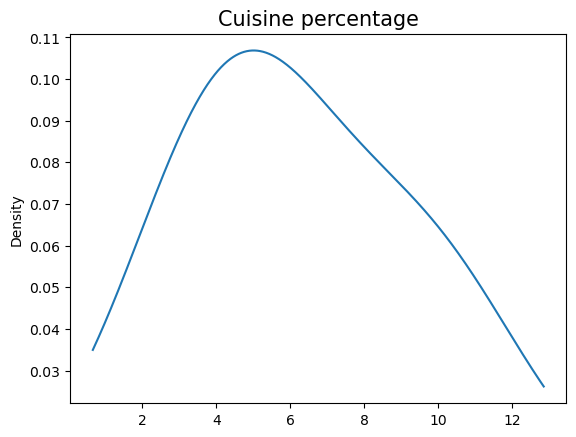

In [82]:
#top cuisines
top_Cuisines=df['Cuisines'].value_counts().nlargest(3)
print("top 3 Cuisines:\n",top_Cuisines)

#cal percentage
total_restaurants=len(df)
Cuisines_percentage=(top_Cuisines/total_restaurants)*100
print("\ntop 3 Cuisines percentage:\n",Cuisines_percentage)
Cuisines_percentage.plot(kind='density',marker='')
plt.title("Cuisine percentage",fontsize=15,color='black')
plt.show()

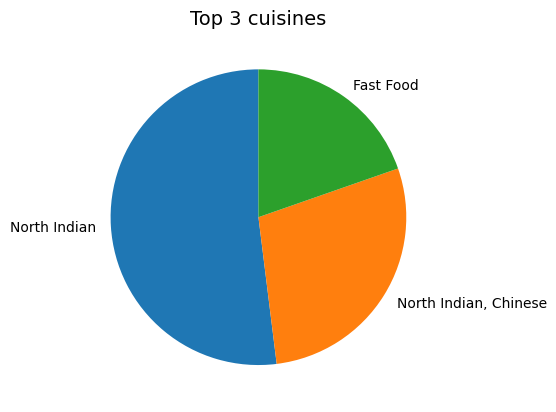

In [45]:
import matplotlib.pyplot as plt
top_Cuisines.plot(kind='pie',startangle=90,)
plt.title("Top 3 cuisines",fontsize=14)
plt.ylabel("")
plt.show()

City with most restaurants: New Delhi
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

City with highest avg rating: Inner City
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


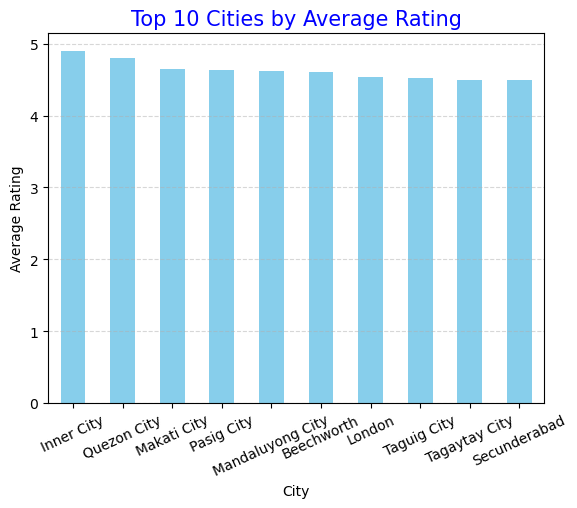

In [77]:
#city
City_counts=df['City'].value_counts()
print("City with most restaurants:",City_counts.idxmax())
print(City_counts.head())

avg_rating=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nCity with highest avg rating:",avg_rating.idxmax())
print(avg_rating.head())

avg_rating.head(10).plot(kind='bar',color='skyblue')
plt.title("Top 10 Cities by Average Rating",fontsize=15,color='b')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=25)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

Restaurants Count by Price range:
 Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

percentage by Price range:
 Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


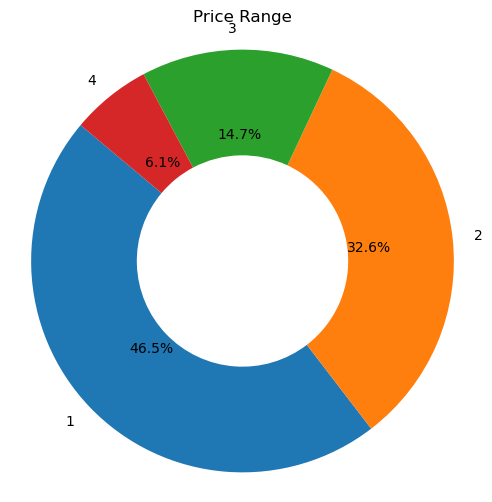

In [15]:
import pandas as pd
df=pd.read_csv(r"C:\Users\prasa\Downloads\food.csv")
Price_counts=df['Price range'].value_counts().sort_index()
print("Restaurants Count by Price range:\n",Price_counts)

Price_percent=(Price_counts/len(df))*100
print("\npercentage by Price range:\n",Price_percent.round(2))

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(Price_counts,labels=Price_counts.index,autopct='%1.1f%%',startangle=140,wedgeprops=dict(width=0.5))
plt.title("Price Range")
plt.axis('equal')
plt.show()

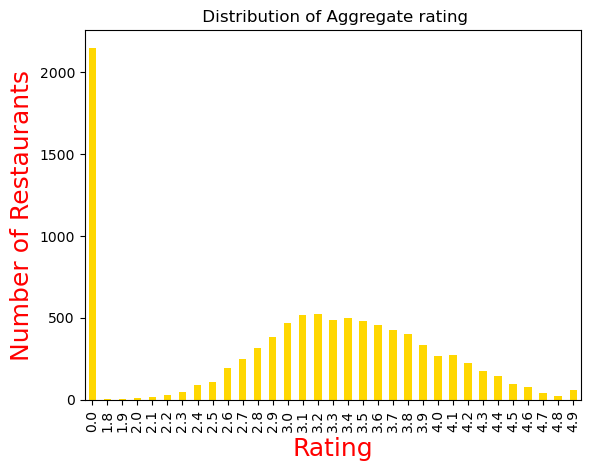

most common rating: 0.0
Average number of votes per restaurant: 156.91


In [3]:
#level 2
#task 1
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\prasa\Downloads\food.csv")
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar',color='gold')
plt.title(" Distribution of Aggregate rating")
plt.xlabel("Rating",color='red',fontsize=18)
plt.ylabel("Number of Restaurants",color='red',fontsize=18)

plt.show()

most_common_rating=df['Aggregate rating'].mode()[0]
print('most common rating:',most_common_rating)

avg_votes=df['Votes'].mean()
print('Average number of votes per restaurant:',
      round(avg_votes,2))


Top Cuisines Combination: Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Cuisines Combinations with highest ratings:
 Cuisines
European, Contemporary             4.9
Sunda, Indonesian                  4.9
Mexican, American, Healthy Food    4.9
European, German                   4.9
Mughlai, Lucknowi                  4.9
Italian, Bakery, Continental       4.9
Burger, Bar Food, Steak            4.9
Italian, Deli                      4.9
Hawaiian, Seafood                  4.9
European, Asian, Indian            4.9
Name: Aggregate rating, dtype: float64


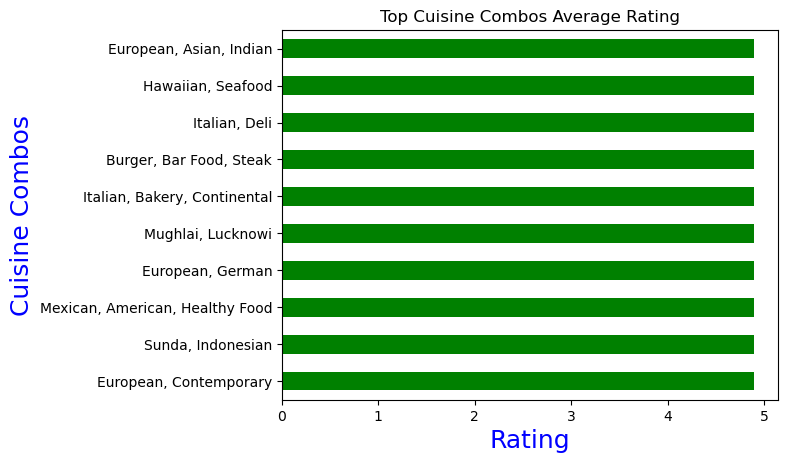

In [31]:
#task 2
common_Cuisines=df['Cuisines'].value_counts().head(10)
print("Top Cuisines Combination:",common_Cuisines)

combo_ratings=df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nCuisines Combinations with highest ratings:\n",combo_ratings.head(10))

#graph
combo_ratings.head(10).plot(kind='barh',color='green')
plt.title("Top Cuisine Combos Average Rating")
plt.xlabel('Rating',color='b',fontsize=18)
plt.ylabel('Cuisine Combos',color='b',fontsize=18)
plt.show()

In [61]:
import folium
map_=folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],zoom_start=10)

for i,row in df.iterrows():
    folium.CircleMarker(
    location=[row['Latitude'],row['Longitude']],
    radius=2,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.4
).add_to(map_)

map_